In [10]:
import pandas as pd

# 주어진 데이터
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
    '어린이인구수': [11317,9383,18563,27887,29043,29035,32314,41671,23640,27949,50300,42691,26860,35143,47791,57283,39630,17852,32366,34712,33102,49699,55528,71106,43078],
    '사고수': [28, 19, 36, 38, 72, 60, 95, 82, 59, 54, 92, 85, 44, 57, 114, 99, 94, 43, 88, 66, 58, 80, 115, 140, 87]
}

df = pd.DataFrame(data)

# 어린이 교통사고 비율 계산
df['어린이교통사고비율'] = (df['사고수'] / df['어린이인구수']) * 100

print(df[['지역구', '어린이교통사고비율']])

     지역구  어린이교통사고비율
0    종로구   0.247415
1     중구   0.202494
2    용산구   0.193934
3    성동구   0.136264
4    광진구   0.247908
5   동대문구   0.206647
6    중랑구   0.293990
7    성북구   0.196780
8    강북구   0.249577
9    도봉구   0.193209
10   노원구   0.182903
11   은평구   0.199105
12  서대문구   0.163812
13   마포구   0.162194
14   양천구   0.238539
15   강서구   0.172826
16   구로구   0.237194
17   금천구   0.240869
18  영등포구   0.271890
19   동작구   0.190136
20   관악구   0.175216
21   서초구   0.160969
22   강남구   0.207103
23   송파구   0.196889
24   강동구   0.201959


In [11]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['종로구', 0.247415],
    ['중구', 0.202494],
    ['용산구', 0.193934],
    ['성동구', 0.136264],
    ['광진구', 0.247908],
    ['동대문구', 0.206647],
    ['중랑구', 0.293990],
    ['성북구', 0.196780],
    ['강북구', 0.249577],
    ['도봉구', 0.193209],
    ['노원구', 0.182903],
    ['은평구', 0.199105],
    ['서대문구', 0.163812],
    ['마포구', 0.162194],
    ['양천구', 0.238539],
    ['강서구', 0.172826],
    ['구로구', 0.237194],
    ['금천구', 0.240869],
    ['영등포구', 0.271890],
    ['동작구', 0.190136],
    ['관악구', 0.175216],
    ['서초구', 0.160969],
    ['강남구', 0.207103],
    ['송파구', 0.196889],
    ['강동구', 0.201959],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수</b></h3>
             '''



m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

In [13]:
import webbrowser

# 생성된 HTML 파일 열기
webbrowser.open('서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수.html')

True

In [12]:
import pandas as pd

# 주어진 데이터
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
    '인구수': [151290, 126171, 228670, 300889, 351350, 346194, 397015, 442650, 313954, 333362, 532905, 480032, 309397, 374035, 458165, 591796, 406664, 232810, 367678, 395963, 500094, 430826, 545169, 675961, 436067],
    '사고수': [28, 19, 36, 38, 72, 60, 95, 82, 59, 54, 92, 85, 44, 57, 114, 99, 94, 43, 88, 66, 58, 80, 115, 140, 87]
}

df = pd.DataFrame(data)

# 어린이 교통사고 비율 계산
df['어린이교통사고비율'] = (df['사고수'] / df['인구수']) * 1000

print(df[['지역구', '어린이교통사고비율']])

     지역구  어린이교통사고비율
0    종로구   0.185075
1     중구   0.150589
2    용산구   0.157432
3    성동구   0.126292
4    광진구   0.204924
5   동대문구   0.173313
6    중랑구   0.239286
7    성북구   0.185248
8    강북구   0.187926
9    도봉구   0.161986
10   노원구   0.172639
11   은평구   0.177072
12  서대문구   0.142212
13   마포구   0.152392
14   양천구   0.248819
15   강서구   0.167287
16   구로구   0.231149
17   금천구   0.184700
18  영등포구   0.239340
19   동작구   0.166682
20   관악구   0.115978
21   서초구   0.185690
22   강남구   0.210944
23   송파구   0.207113
24   강동구   0.199511


In [14]:
import folium
from folium import plugins
import pandas as pd

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

raw_data = [
    ['종로구', 0.185075],
    ['중구', 0.150589],
    ['용산구', 0.157432],
    ['성동구', 0.126292],
    ['광진구', 0.204924],
    ['동대문구', 0.173313],
    ['중랑구', 0.239286],
    ['성북구', 0.185248],
    ['강북구', 0.187926],
    ['도봉구', 0.161986],
    ['노원구', 0.172639],
    ['은평구', 0.177072],
    ['서대문구', 0.142212],
    ['마포구', 0.152392],
    ['양천구', 0.248819],
    ['강서구', 0.167287],
    ['구로구', 0.231149],
    ['금천구', 0.184700],
    ['영등포구', 0.239340],
    ['동작구', 0.166682],
    ['관악구', 0.115978],
    ['서초구', 0.185690],
    ['강남구', 0.210944],
    ['송파구', 0.207113],
    ['강동구', 0.199511],
]

data = pd.DataFrame(raw_data, columns=['name', 'value'])

m = folium.Map(location=[37.566345, 126.977893], zoom_start=12)

# Choropleth 추가
folium.Choropleth(geo_data=geo_json,
                  name='choropleth',
                  data=data, columns=['name', 'value'],
                  key_on='feature.properties.name',
                  fill_color='Reds',
                  fill_opacity=0.7,
                  line_opacity=0.5,  # 경계선 투명도
                  line_color='black',  # 경계선 색상
                  line_weight=2,  # 경계선 굵기
                  highlight=True,
                  ).add_to(m)

# 구별 중심 좌표 및 텍스트 추가
centers = {
    '종로구': [37.5949159, 126.977339],
    '중구': [37.5601443, 126.9959649],
    '용산구': [37.5313805, 126.9798839],
    '성동구': [37.5510171, 127.0410394],
    '광진구': [37.5467284, 127.0857543],
    '동대문구': [37.5819561, 127.054846],
    '중랑구': [37.5978139, 127.0928927],
    '성북구': [37.6056991, 127.0175664],
    '강북구': [37.6434801, 127.0111839],
    '도봉구': [37.6691065, 127.0323527],
    '노원구': [37.6525076, 127.075042],
    '은평구': [37.6191784, 126.9270142],
    '서대문구': [37.5777796, 126.9390623],
    '마포구': [37.5593115, 126.9082589],
    '양천구': [37.5247402, 126.8553909],
    '강서구': [37.5612346, 126.8228132],
    '구로구': [37.4944134, 126.8563336],
    '금천구': [37.4605655, 126.9008183],
    '영등포구': [37.5223245, 126.9101692],
    '동작구': [37.4988794, 126.9516345],
    '관악구': [37.4673709, 126.9453359],
    '서초구': [37.4732933, 127.0312101],
    '강남구': [37.4966645, 127.0629804],
    '송파구': [37.5056205, 127.1152992],
    '강동구': [37.5504483, 127.1470117],
}

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"<div style='font-size: 12; color: white; text-align: center;"
                                  f" background-color: transparent; text-shadow: -1px -1px 2px #000;'>{name}</div>")
    ).add_to(m)

# MiniMap 추가
minimap = plugins.MiniMap()
m.add_child(minimap)

# 제목 추가
title_html = '''
             <h3 align="center" style="font-size:20px"><b>서울특별시 구별 어린이 인구수 대비 어린이 교통사고 건수</b></h3>
             '''



m.get_root().html.add_child(folium.Element(title_html))

# HTML 파일로 저장
m.save('서울특별시 구별 인구수 대비 어린이 교통사고 건수.html')

In [12]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 유치원.csv"
df = pd.read_csv(file_path, encoding='euc-kr')

# 주소 컬럼에서 '구' 정보를 추출
df['구'] = df['주소'].str.extract(r'([가-힣]+구)')

# 각 구별로 유치원 개수를 파악
count_by_gu = df['구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

구
종로구     17
중구      14
용산구     17
성동구     31
광진구     36
동대문구    33
중랑구     33
성북구     52
강북구     22
도봉구     29
노원구     69
은평구     45
서대문구    23
마포구     26
양천구     47
강서구     59
구로구     35
금천구     19
영등포구    40
동작구     37
관악구     36
서초구     29
강남구     40
송파구     54
강동구     34
Name: count, dtype: int64


In [13]:
import pandas as pd

# CSV 파일에서 데이터를 읽어옴
file_path = "서울시 어린이집.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 지역구별 어린이집 수 세기
count_by_gu = df['지역구'].value_counts()

# 원하는 순서로 구 이름 정렬
desired_order = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', 
    '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', 
    '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', 
    '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
count_by_gu = count_by_gu.reindex(desired_order)

# 결과 출력
print(count_by_gu)

지역구
종로구     116
중구       94
용산구     179
성동구     275
광진구     294
동대문구    308
중랑구     372
성북구     462
강북구     243
도봉구     396
노원구     675
은평구     520
서대문구    274
마포구     373
양천구     478
강서구     604
구로구     489
금천구     266
영등포구    423
동작구     338
관악구     398
서초구     330
강남구     359
송파구     670
강동구     430
Name: count, dtype: int64


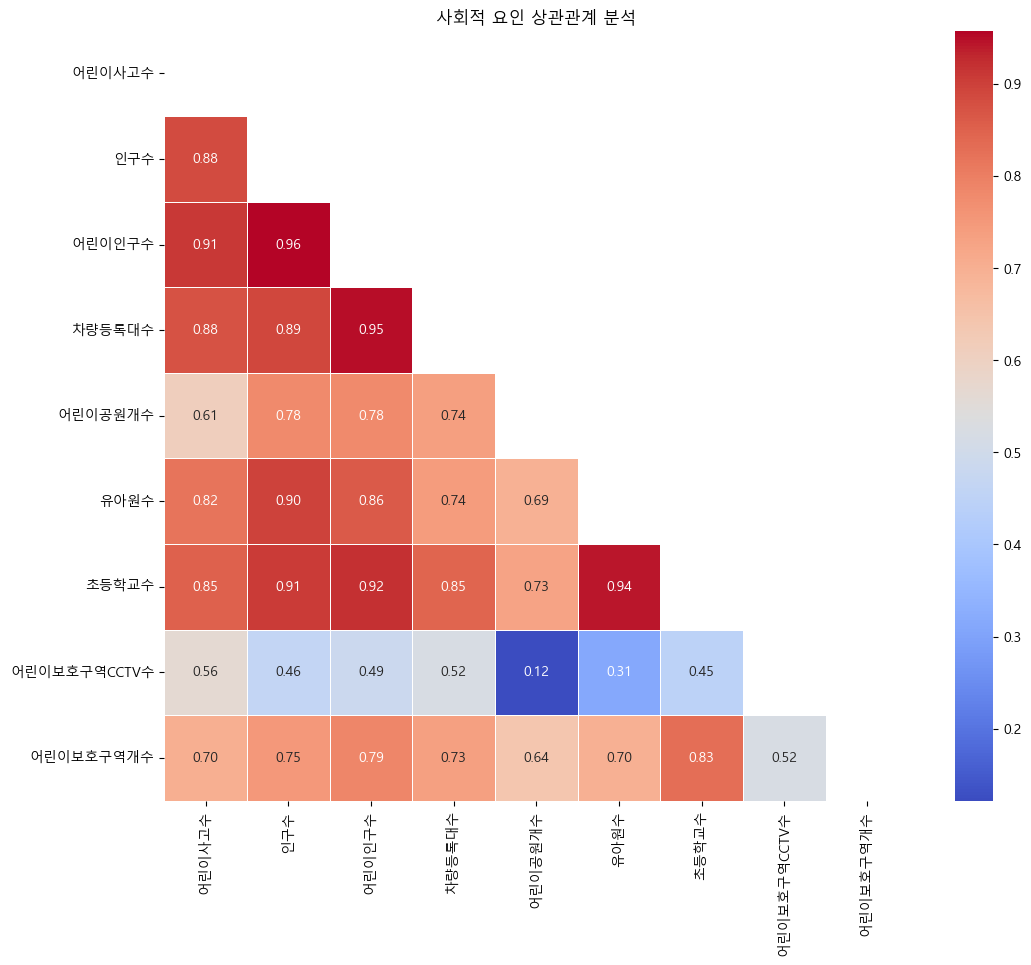

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 읽기
file_path = "서울종합DB(어린이인구).csv"
df = pd.read_csv(file_path, encoding='cp949')

# '지역구', '유치원수', '어린이집수', '초등학교수' 컬럼 삭제
df = df.drop(columns=['지역구', '유치원수', '어린이집수'])

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

# 상관관계 행렬의 아래 삼각형에 마스크 생성
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("사회적 요인 상관관계 분석")
plt.show()

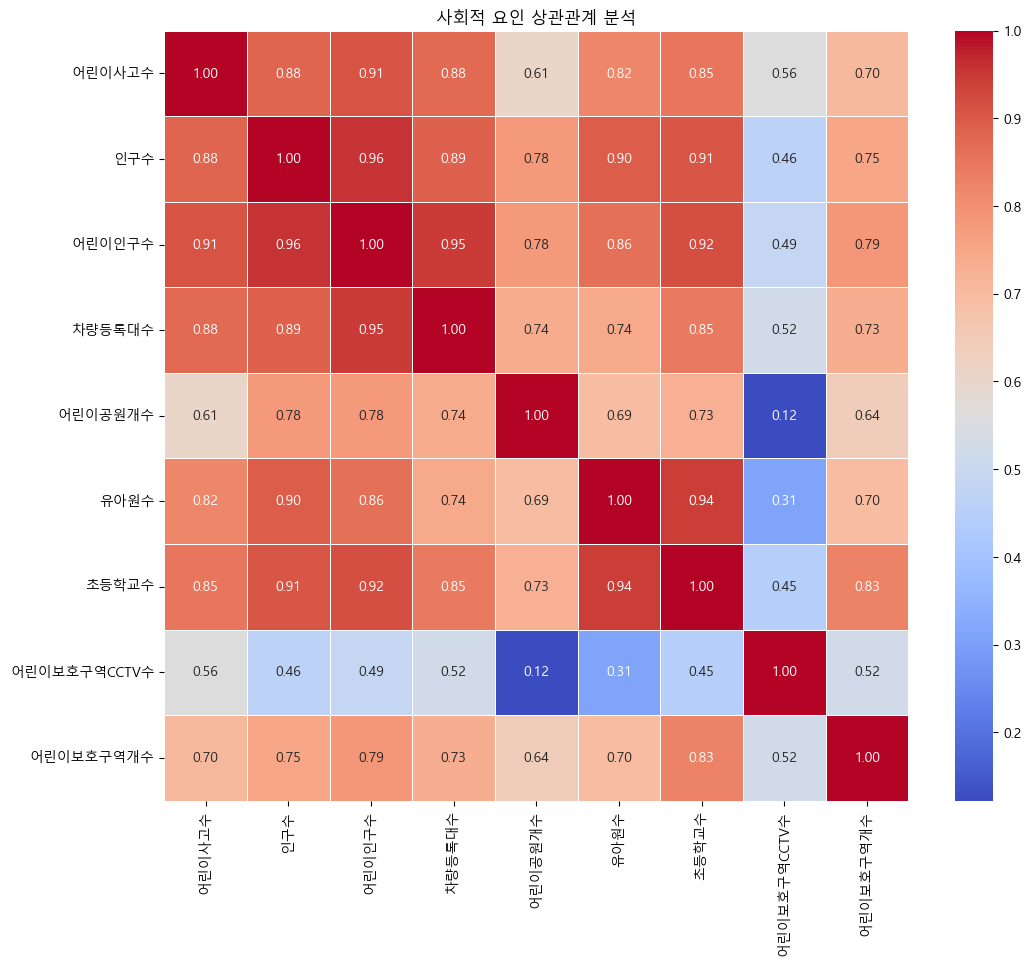

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 읽기
file_path = "서울종합DB(어린이인구).csv"
df = pd.read_csv(file_path, encoding='cp949')

# '지역구', '유치원수', '어린이집수', '초등학교수' 컬럼 삭제
df = df.drop(columns=['지역구', '유치원수', '어린이집수'])

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

# 상관관계 행렬의 아래 삼각형에 마스크 생성
# mask = np.zeros_like(correlation_matrix)
# mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("사회적 요인 상관관계 분석")
plt.show()

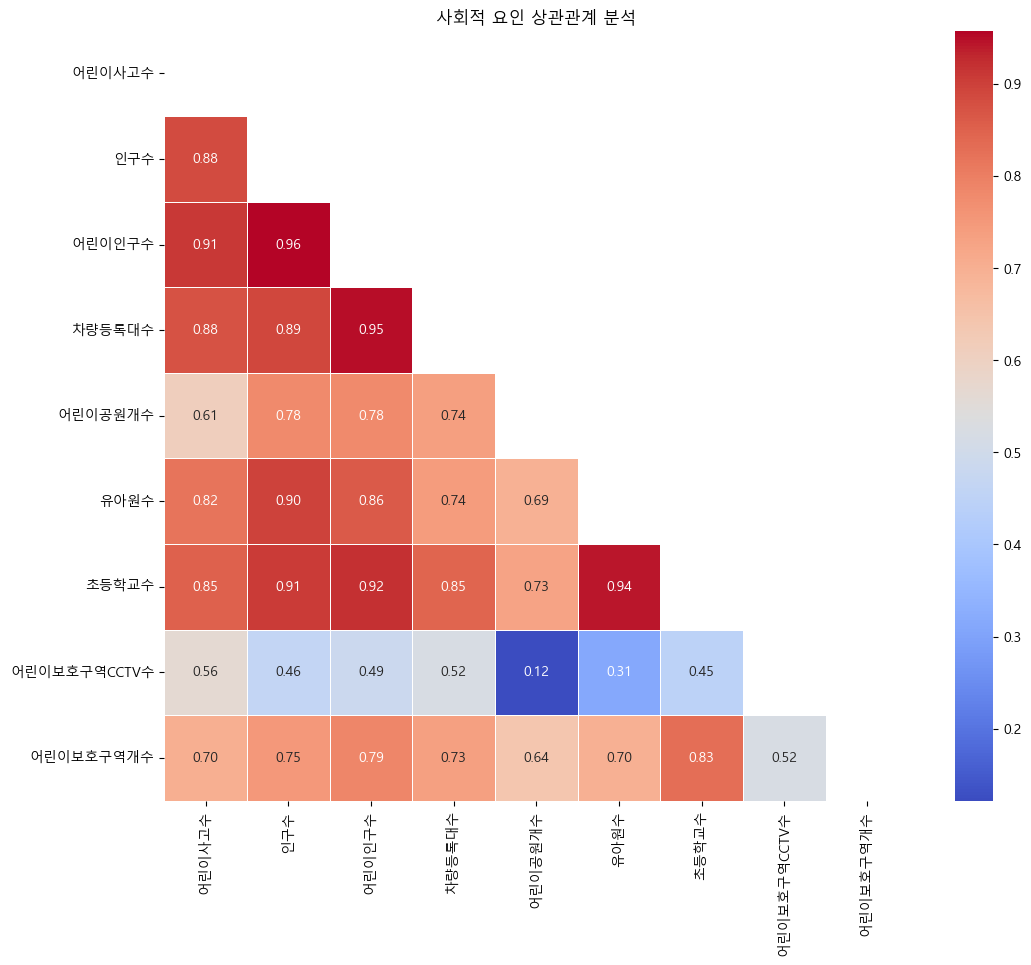

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 읽기
file_path = "서울종합DB(어린이인구).csv"
df = pd.read_csv(file_path, encoding='cp949')

# '지역구', '유치원수', '어린이집수' 컬럼 삭제
df = df.drop(columns=['지역구', '유치원수', '어린이집수'])

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

# 히트맵 그리기 - 아래쪽 삼각형만 표시되도록 마스크 사용
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("사회적 요인 상관관계 분석")
plt.show()